# Clustering K-means(Apply two clustering methods in your datasets)

Name: Miyar Karthik Kamath

Student ID: 017449133

### Dataset: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

The data contains information from the 1990 California census. The data was sourced from Kaggle.

**Columns**:

*   longitude
*   latitude
*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value
*   ocean_proximity

### Business Objective:

The primary business objective is to use machine learning to analyze a particular investment, help investors make data-driven decisions when purchasing investment properties, and analyze real estate prices by looking at affordability to maximize profitability and minimize risk.




### Importing Dependencies and Loading Dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

import seaborn as sns
import torch
import torch.nn.functional as F
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/ML-Fall-2024/team-deep-thinkers/data/housing.csv'
housing_data = pd.read_csv(file_path)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Wrangling and Preparation

Clearing missing values, scaling data, and selecting relevant features for clustering.

In [ ]:
housing_data.isnull().sum()

housing_data = housing_data.dropna()

features = housing_data[['median_income', 'median_house_value']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Applying K-Means Clustering using Scikit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


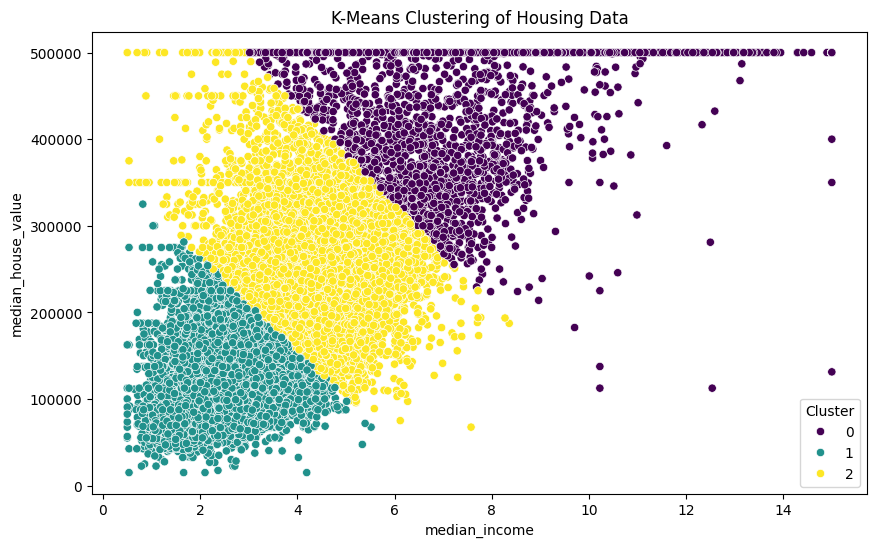

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
housing_data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'], hue=housing_data['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Housing Data')
plt.show()

### Applying Gaussian Mixture Model using Scikit

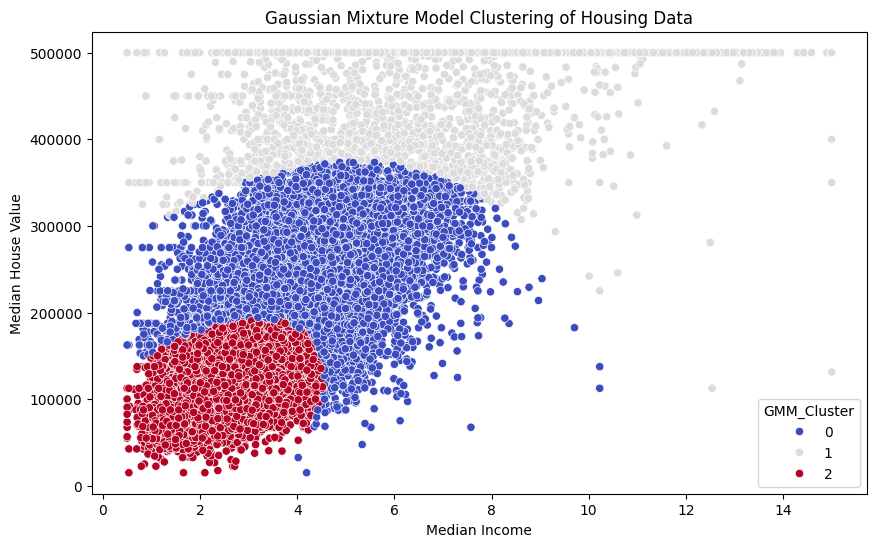

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
housing_data['GMM_Cluster'] = gmm.fit_predict(scaled_features)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'], hue=housing_data['GMM_Cluster'], palette='coolwarm')
plt.title('Gaussian Mixture Model Clustering of Housing Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

### Applying K-Means Clustering using PyTorch

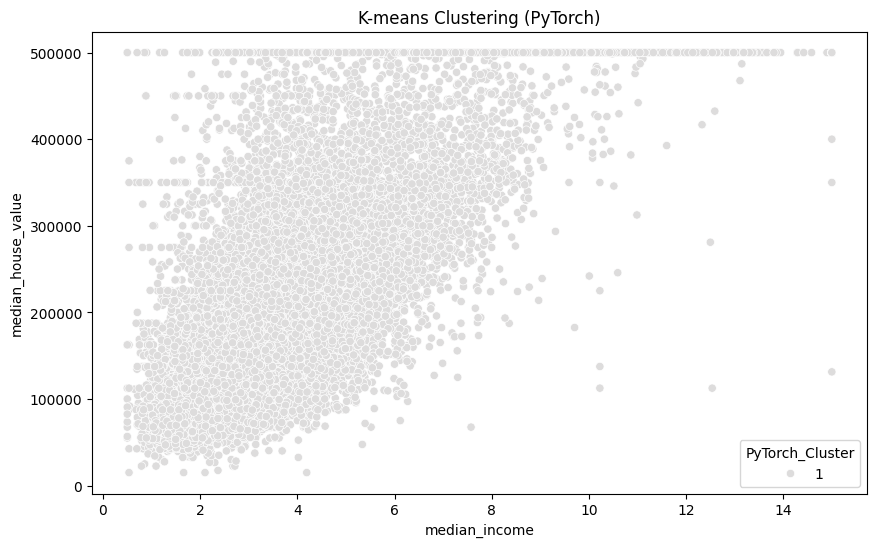

In [ ]:
features_tensor = torch.tensor(scaled_features, dtype=torch.float)

def euclidean_distance(x1, x2):
    return torch.sqrt(torch.sum((x1 - x2) ** 2))

def kmeans_clustering(data, k, num_iters=100):
    indices = torch.randperm(data.size(0))[:k]
    centers = data[indices]

    for _ in range(num_iters):
        distances = torch.stack([euclidean_distance(data, c) for c in centers])
        assignments = torch.argmin(distances, dim=0)

        new_centers = torch.stack([data[assignments == i].mean(dim=0) for i in range(k)])

        if torch.equal(centers, new_centers):
            break
        centers = new_centers

    return assignments

torch_cluster_labels = kmeans_clustering(features_tensor, k=3)
housing_data['PyTorch_Cluster'] = torch_cluster_labels.numpy()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'], hue=housing_data['PyTorch_Cluster'], palette='coolwarm')
plt.title('K-means Clustering (PyTorch)')
plt.show()
